CSCI2000U final project group 9:
    Paul Hruda, Garrett Kawabata, Anthony Liscio

In [450]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_data_csv():
    collection = []
    with open('imdb_top_1000.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

data_df = pd.DataFrame(data)

# **1.**
**What is the average IMDB rating per genre? What are the top three?**

In [451]:
# the different genres
total_genres = []
genres = []

def fill_list_total(list_to_fill, key):   
    for i in range(len(data)):
        if data[i][key]:
            list_to_fill.append(data[i][key])

def fill_unique(list_to_fill, total_list):
    for i in total_list:
        if i not in list_to_fill:
            list_to_fill.append(i)

fill_list_total(total_genres, "Genre")
total_genres = [line.split(',')[0] for line in total_genres] # many movies have more than one genre which are seperated
                                                             # by comma, so this just removes the commas and splits the data into their own elements
fill_unique(genres, total_genres)

print("There are "+str(len(genres))+" different game genres:")
print(genres)

There are 14 different game genres:
['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy', 'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir', 'Fantasy', 'Family', 'Thriller']


In [452]:
def get_imdb_by_genre(genre):
    return data_df['IMDB_Rating'][data_df['Genre'].str.contains(genre, regex=False)]

imdb_by_genre = pd.DataFrame(index=range(len(data_df)),columns=range(len(genres)))
imdb_by_genre.columns = genres

for i in genres:
    imdb_by_genre[i] = get_imdb_by_genre(i)
    imdb_by_genre[i] = imdb_by_genre[i].astype(float)

avg_imdb_by_genre = imdb_by_genre.mean(axis = 0, skipna = True)

print('Average IMDB ratings (by genre):')
print(avg_imdb_by_genre.round(3))
print('\nTop 3 IMDB rating (by genre):\n'+str(avg_imdb_by_genre.sort_values(ascending = False).round(3)[:3]))

Average IMDB ratings (by genre):
Drama       7.96
Crime       7.96
Action      7.95
Biography   7.94
Western     8.00
Comedy      7.90
Adventure   7.95
Animation   7.93
Horror      7.89
Mystery     7.97
Film-Noir   7.99
Fantasy     7.93
Family      7.91
Thriller    7.91
dtype: float64

Top 3 IMDB rating (by genre):
Western     8.00
Film-Noir   7.99
Mystery     7.97
dtype: float64


# **2.**
**Does the runtime correlate to the IMDB rating?**

In [453]:
df_rt_imdb = data_df[['Runtime', 'IMDB_Rating']]
df_rt_imdb['Runtime'] = df_rt_imdb['Runtime'].map(lambda x: x.rstrip(' min'))
df_rt_imdb['Runtime'] = df_rt_imdb['Runtime'].astype(int)
df_rt_imdb['IMDB_Rating'] = df_rt_imdb['IMDB_Rating'].astype(float)
correlation = df_rt_imdb.corr()
correlation

/tmp/ipykernel_44/3534495771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_imdb['Runtime'] = df_rt_imdb['Runtime'].map(lambda x: x.rstrip(' min'))
/tmp/ipykernel_44/3534495771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_imdb['Runtime'] = df_rt_imdb['Runtime'].astype(int)
/tmp/ipykernel_44/3534495771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Runtime,IMDB_Rating
Runtime,1.00,0.24
IMDB_Rating,0.24,1.00


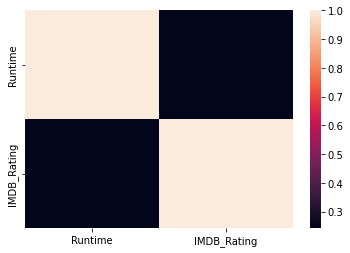

In [454]:
sns.heatmap(correlation);

*The chart and this visualization show that there is no real correlation between runtime and IMBD rating since the correlation coefficient is 0.24 (and in the visualization it is black, indicating the correlation coefficient is around 0.3).  This also makes sense later on as we see that runtime of a movie does not neccessarily mean it will recieve a good or bad rating.*

# **3.**
**Do any directors appear more than once? If so who appears most often?**

In [455]:
director_uni = data_df['Director'].nunique()
print("There are ", director_uni, " different directors")

There are  548  different directors


In [456]:
data_df['Movie_Count'] = 1

director_stats = data_df[['Director', 'Movie_Count']].groupby(['Director']).sum()
data_df['IMDB_Rating'] = data_df['IMDB_Rating'].astype(float)
director_stats['IMDB_Rating'] = data_df[['Director','IMDB_Rating']].groupby(['Director']).mean()
director_stats = director_stats.rename(columns={"IMDB_Rating" : "avg IMDB_Rating"})

data_df['No_of_Votes'] = data_df['No_of_Votes'].astype(float)
director_stats['No_of_Votes'] = data_df[['Director','No_of_Votes']].groupby(['Director']).mean()

director_stats = director_stats.rename(columns={"No_of_Votes" : "avg No_of_Votes"})
pd.options.display.float_format = "{:,.2f}".format

In [457]:
#There are directors who appear more than once 
#Top 10 Directors by Number of Movies in the list
print("Top 10 Directors by Number of Movies:")
director_stats = director_stats.sort_values(by=['Movie_Count'], ascending=False)
director_stats.head(10)

Top 10 Directors by Number of Movies:


,Movie_Count,avg IMDB_Rating,avg No_of_Votes
Director,,,
Alfred Hitchcock,14,8.01,"192,612.64"
Steven Spielberg,13,8.03,"601,320.46"
Hayao Miyazaki,11,8.02,"213,519.82"
Martin Scorsese,10,8.17,"651,353.00"
Akira Kurosawa,10,8.22,"94,159.90"
Stanley Kubrick,9,8.23,"435,472.67"
Woody Allen,9,7.79,"135,834.22"
Billy Wilder,9,8.14,"115,322.56"
Quentin Tarantino,8,8.18,"1,015,401.00"


# **4.**
**What is the average meta score rating per genre? What are the top three?**

In [458]:
data_df2 = data_df
data_df2.replace("", np.nan, inplace=True)
data_df2 = data_df2.dropna()

def get_metascore_by_genre(genre):
    return data_df2['Meta_score'][data_df2['Genre'].str.contains(genre, regex=False)].astype(int)

metascore_by_genre = pd.DataFrame(index=range(len(data_df)),columns=range(len(genres)))
metascore_by_genre.columns = genres

for i in genres:
    metascore_by_genre[i] = get_metascore_by_genre(i)

avg_metascore_by_genre = metascore_by_genre.mean(axis = 0, skipna = True)

print('Average Meta Scores (by genre):')
print(avg_metascore_by_genre.round(3))
print('\nTop 3 Meta Score (by genre):\n'+str(avg_metascore_by_genre.sort_values(ascending = False).round(3)[:3]))

Average Meta Scores (by genre):
Drama       77.18
Crime       74.44
Action      73.79
Biography   76.43
Western     81.06
Comedy      77.44
Adventure   77.88
Animation   81.84
Horror      77.28
Mystery     77.21
Film-Noir   91.83
Fantasy     76.00
Family      77.23
Thriller    76.01
dtype: float64

Top 3 Meta Score (by genre):
Film-Noir   91.83
Animation   81.84
Western     81.06
dtype: float64


# **5.**
**What year has the highest meta score? (using the avg meta score per year)**

In [459]:
data_df6 = pd.DataFrame(data)
data_df6.replace("", np.nan, inplace=True)
data_df6 = data_df6.dropna()
data_df6['Movie_Count'] = 1

ms_stats = data_df6[['Released_Year', 'Movie_Count']].groupby(['Released_Year']).sum()
data_df6['Meta_score'] = data_df6['Meta_score'].astype(float)
ms_stats['Meta_score'] = data_df6[['Released_Year','Meta_score']].groupby(['Released_Year']).mean()
ms_stats = ms_stats.rename(columns={"Meta_score" : "avg Meta_score"})

In [460]:
#Top 15 years by avg Meta Score
print("Top 15 years by average Meta Score:")
ms_stats = ms_stats.sort_values(by=['avg Meta_score'], ascending=False)
ms_stats.head(15)

Top 15 years by average Meta Score:


,Movie_Count,avg Meta_score
Released_Year,,
1941,1,100.00
1942,1,100.00
1931,1,99.00
1948,1,98.00
1950,1,98.00
1938,1,97.00
1949,1,97.00
1946,2,96.50
1936,1,96.00


*So the highest average Meta Score (100) came in 1941 and 1942 (both the only movies published that year)*

# **6.**
**Runtime per certification?**

In [461]:
cert_stats = data_df[['Certificate', 'Runtime']]
cert_stats['Runtime'] = cert_stats['Runtime'].map(lambda x: x.rstrip(' min'))
cert_stats['Runtime'] = cert_stats['Runtime'].astype(int)
cert_stats = cert_stats[['Certificate', 'Runtime']].groupby(['Certificate']).mean()
cert_stats = cert_stats.rename(columns={"Runtime" : "avg Runtime (min)"})
cert_stats

/tmp/ipykernel_44/4145960008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cert_stats['Runtime'] = cert_stats['Runtime'].map(lambda x: x.rstrip(' min'))
/tmp/ipykernel_44/4145960008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cert_stats['Runtime'] = cert_stats['Runtime'].astype(int)


,avg Runtime (min)
Certificate,
16,130.00
A,128.94
Approved,111.09
G,119.67
GP,124.50
PG,114.27
PG-13,116.95
Passed,106.21
R,122.37


# **7.** 
**What is the shortest runtime? What is the longest runtime? Which one has the higher IMDB rating? Which one has the higher meta score?
Follow up questions: What is the runtime of the movie with the highest meta score? How does it compare to the highest/lowest runtime movies?**

In [462]:
data_df4 = pd.DataFrame(data)

In [463]:
data_df4['Runtime'] = data_df4['Runtime'].str.replace(r'\D', '') # removing str 'min' from each value
data_df4['Runtime'] = data_df4['Runtime'].astype(int) # converting the str values to ints

/tmp/ipykernel_44/1842341354.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df4['Runtime'] = data_df4['Runtime'].str.replace(r'\D', '') # removing str 'min' from each value


In [464]:
shortest_rt = data_df4['Runtime'].min()
print("The shortest runtime is: "+str(shortest_rt)+" minutes")
longest_rt = data_df4['Runtime'].max()
print("The longest runtime is: "+str(longest_rt)+" minutes")

The shortest runtime is: 45 minutes
The longest runtime is: 321 minutes


In [465]:
shortest_rt_IMDB_rating = data_df4['IMDB_Rating'][data_df4['Runtime'] == shortest_rt]
print("Shortest runtime IMDB rating: "+str(float(shortest_rt_IMDB_rating.values)))
longest_rt_IMDB_rating = data_df4['IMDB_Rating'][data_df4['Runtime'] == longest_rt]
print("Longest runtime IMDB rating: "+str(float(longest_rt_IMDB_rating.values)))

Shortest runtime IMDB rating: 8.2
Longest runtime IMDB rating: 8.2


In [466]:
# x is the movie with the shorter runtime, y is the movie with the longer runtime
def compare_values(x, y):
    if x > y:
        return "The movie with the shortest runtime has the higher IMDB rating"
    elif y > x:
        return "The movie with the longest runtime has the higher IMDB rating"
    else:
        return "Both movies have the exact same IMDB rating"

result = compare_values(float(longest_rt_IMDB_rating.values), float(shortest_rt_IMDB_rating.values))
print(result)

shortest_rt_meta_score = data_df4['Meta_score'][data_df4['Runtime'] == shortest_rt]
print("Shortest runtime movie meta score: "+str(shortest_rt_meta_score.values))
print("Shortest runtime movie has no meta score\n")


data_df5 = data_df4.drop(labels=194, axis=0)
shortest_rt_2 = data_df5['Runtime'].min()
print("The next shortest runtime is: "+str(shortest_rt_2))

Both movies have the exact same IMDB rating
Shortest runtime movie meta score: ['']
Shortest runtime movie has no meta score

The next shortest runtime is: 64


In [467]:
shortest_rt_meta_score_2 = data_df4['Meta_score'][data_df4['Runtime'] == shortest_rt_2]
print("The next shortest runtime movie meta score: "+str(float(shortest_rt_meta_score_2.values)))

longest_rt_meta_score = data_df4['Meta_score'][data_df4['Runtime'] == longest_rt]
print("Longest runtime movie meta score: "+str(float(longest_rt_meta_score.values)))

The next shortest runtime movie meta score: 80.0
Longest runtime movie meta score: 89.0


In [468]:
# x is the movie with the shorter runtime, y is the movie with the longer runtime
def compare_values_2(x, y):
    if x > y:
        return "The movie with the shortest runtime has the higher meta score"
    elif y > x:
        return "The movie with the longest runtime has the higher meta score"
    else:
        return "Both movies have the exact same meta score"
    
result_2 = compare_values_2(float(shortest_rt_meta_score_2.values), float(longest_rt_meta_score.values))
print(result_2)

The movie with the longest runtime has the higher meta score


In [469]:
# Follow up questions:
# What is the runtime of the movie with the highest meta score?
# How does it compare to the highest/lowest runtime movies?
highest_ms = data_df4['Meta_score'].max()
highest_ms_mov = data_df4[data_df4['Meta_score'] == highest_ms]
avg_runtime = highest_ms_mov['Runtime'].mean()
print("The average runtime of the movies with the joint highest meta score is: "+str(avg_runtime))

The average runtime of the movies with the joint highest meta score is: 94.25


# **8.**
**Which director has the highest IMDB score? Which director has the highest Meta score?**

In [470]:
#Top 10 Directors by No of Votes on IMDB
print("Top 10 Directors by average number of votes on IMDb:")
director_stats = director_stats.sort_values(by=['avg No_of_Votes'], ascending=False)
director_stats.head(10)

Top 10 Directors by average number of votes on IMDb:


,Movie_Count,avg IMDB_Rating,avg No_of_Votes
Director,,,
Frank Darabont,2,8.95,"1,745,452.00"
Lana Wachowski,1,8.70,"1,676,426.00"
Christopher Nolan,8,8.46,"1,447,293.12"
George Lucas,1,8.60,"1,231,473.00"
Peter Jackson,5,8.40,"1,229,715.80"
Irvin Kershner,1,8.70,"1,159,315.00"
James McTeigue,1,8.20,"1,032,749.00"
Quentin Tarantino,8,8.18,"1,015,401.00"
Gore Verbinski,1,8.00,"1,015,122.00"


In [471]:
#Find movies directed by Darabont
Darabont = data_df.loc[data_df['Director'].str.contains("Frank Darabont")]
Darabont

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Movie_Count
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,343,110.00","28,341,469",1
25,https://m.media-amazon.com/images/M/MV5BMTUxMz...,The Green Mile,1999,A,189 min,"Crime, Drama, Fantasy",8.60,The lives of guards on Death Row are affected ...,61,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,"1,147,794.00","136,801,374",1


In [472]:
data_df.replace("", np.nan, inplace=True)
data_df = data_df.dropna()
data_df['Meta_score'] = data_df['Meta_score'].astype(int)
director_stats['Meta_score'] = data_df[['Director','Meta_score']].groupby(['Director']).mean()
director_stats = director_stats.rename(columns={"Meta_score" : "avg Meta_score"})

In [473]:
#Top 10 Directors by average Meta Score
print("Top 10 Directors by average Meta Score:\n")
director_stats = director_stats.sort_values(by=['avg Meta_score'], ascending=False)
director_stats.head(10)

Top 10 Directors by average Meta Score:



,Movie_Count,avg IMDB_Rating,avg No_of_Votes,avg Meta_score
Director,,,,
Ingmar Bergman,7,8.14,"72,296.14",100.00
Orson Welles,2,8.15,"250,891.00",99.50
Michael Curtiz,2,8.20,"284,634.00",98.50
Guillermo del Toro,1,8.20,"618,623.00",98.00
Joseph L. Mankiewicz,2,8.10,"82,643.50",98.00
Charles Chaplin,6,8.33,"138,907.00",97.50
Akira Kurosawa,10,8.22,"94,159.90",97.00
Sam Peckinpah,1,7.90,"77,401.00",97.00
Carol Reed,1,8.10,"158,731.00",97.00
